# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania 1 pkt


In [191]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

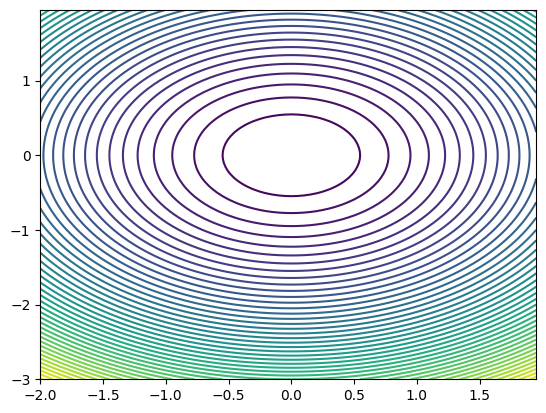

In [192]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

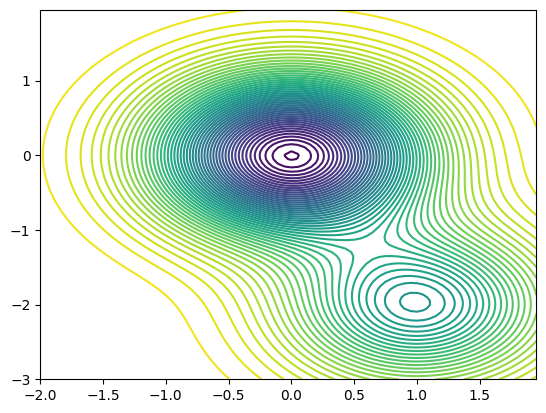

In [193]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [194]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        self.alpha = random.uniform(0.1, 0.3)
        grad_x1, grad_x2 = self.calculate_func_grad(x1, x2)
        return (x1 - self.alpha * grad_x1, x2 - self.alpha * grad_x2)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        self.trace = np.array([[x1_init, x2_init]], )
        for _ in range(steps):
            new_x1, new_x2 = self.gradient_descent_step(x1_init, x2_init)
            x1_init, x2_init = new_x1, new_x2
            self.trace = np.append(self.trace, np.array([[x1_init, x2_init]]))
        self.trace = self.trace.reshape(steps + 1, 2)
        if plot:
            self.plot_func()
        return self.func(x1_init, x2_init)

# Funkcja 1

4.293804116907421e-45


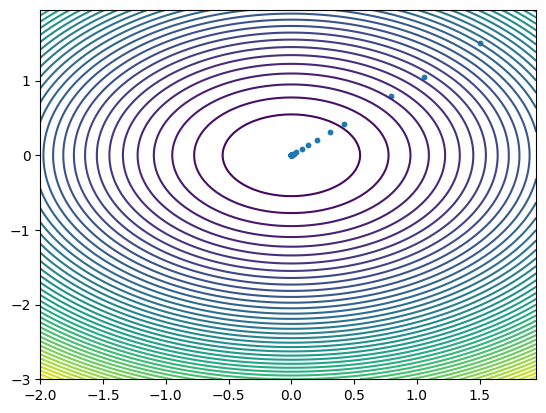

In [195]:
def func_f(x1: float, x2: float) -> float:
    return (x1 ** 2 + x2 ** 2)

def grad_f(x1: float, x2: float) -> Tuple[float, float]:
    return [2 * x1, 2 * x2]

x1, x2 = 1.5, 1.5   # any
sgd_f = SimpleGradientDescent(func_f, grad_f)
result = sgd_f.minimize(x1, x2, 100, verbose=0, plot=True)
print(result)

# Funkcja 2

0.4965724836763416


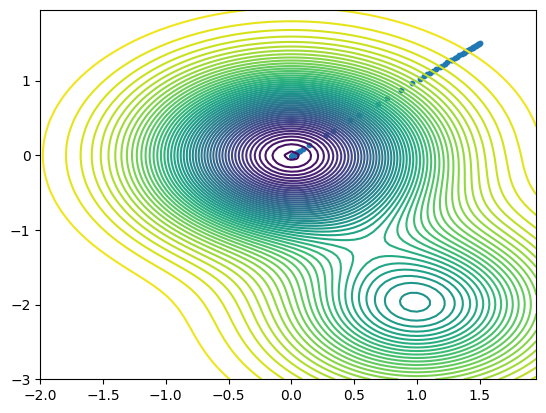

In [196]:
def func_g(x1: float, x2: float) -> float:
    return (1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2)))


def grad_g(x1: float, x2: float) -> Tuple[float, float]:
    return [2*x1*np.exp(-x1**(2)-x2**(2))+(x1-1)*np.exp(-(x1-1)**(2)-(x2+2)**(2)),
            2*x2*np.exp(-x1**(2)-x2**(2))+(x2+2)*np.exp(-(x1-1)**(2)-(x2+2)**(2))]


x1, x2 = 1.5, 1.5   # any
sgd_g = SimpleGradientDescent(func_g, grad_g)
result = sgd_g.minimize(x1, x2, 100, verbose=0, plot=True)
print(result)